<a href="https://colab.research.google.com/github/ryokob/test1/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                       g         a  Growth Rate  Capital Share
country                                                       
Canada          0.887700  0.346190     0.887700       0.346190
France          0.829236  0.381194     0.829236       0.381194
Germany         0.661055  0.370730     0.661055       0.370730
Italy          -0.037181  0.484835    -0.037181       0.484835
Japan           0.710956  0.430601     0.710956       0.430601
United Kingdom  1.015544  0.412993     1.015544       0.412993
United States   1.536985  0.393260     1.536985       0.393260


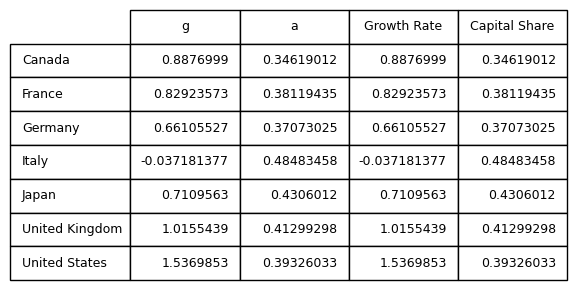

In [17]:
# keio quant-macro assignment2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
data = pwt1001.loc[pwt1001['country'].isin(["France", "Germany", "Canada", "Italy", "Japan", "United Kingdom", "United States"])][['year', 'country', 'rgdpna', 'rkna', 'emp', 'labsh']]

data = data.loc[(data['year'] >= 1995) & (data['year'] <= 2019)].dropna()

# Calculate additional columns
data['y_pc'] = np.log(data['rgdpna'] / data['emp'])  # GDP per worker
data['k_pc'] = np.log(data['rkna'] / data['emp'])  # Capital per worker
data['a'] = 1 - data['labsh']  # Capital share

# Order by year
data = data.sort_values('year')

# Group by isocode
grouped_data = data.groupby('country')

# Calculate growth rates and Solow residual
data['g'] = (grouped_data['y_pc'].diff() * 100)  # Growth rate of GDP per capita

# Remove missing values
data = data.dropna()

# Calculate summary statistics
summary = data.groupby('country').agg({'g': 'mean',
                                       'a': "mean"})

# Calculate additional summary statistics
summary['Growth Rate'] = summary['g']
summary['Capital Share'] = summary['a']

# Print output
print(summary)

# 画像にする
f = plt.figure(figsize=(6, 3))
a = f.gca()
a.axis("off")
a.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index,
        loc="center", bbox=[0, 0, 1, 1])
plt.tight_layout()
plt.savefig("juni-main.png", bbox_inches="tight")